<img src="https://i.imgur.com/uYEYnzb.png">

# **GEOSCIENTIFIC WORD EMBEDDINGS on CONFERENCE ABSTRACTS**


### Analysing Unstructured Geosciences Data for a Changing World.

##### *By Ramy Abdallah*

<img src="https://i.imgur.com/5jq0FX7.png">

## **Introduction**

This study was created on the framework of understainding how the natural lanuages processing can help in geosciences. The project aims to investigate a set of geosciences word embeddings and identify the most similar term to five given terms. Moreover, calculate the nearest term to a vector calculation problem. These terms were Salt, Ghost, Gather, and elastic. The vector calculations computed were P-wave - compressional plus shear, seal - mudstone plus sandstone, PSTM -time plus depth and finally Kirchoff - ray plus wavefield. 

<img src="https://i.imgur.com/7DQmu0y.png">

## **Dataset**

The data is composed of summaries of geoscience conference abstracts and journal papers. The data was loaded using a token as an environment variable. 

## **Generalised Workflow**

To generate word embeddings from geoscientific texts follow the following workflow:

1. Read in our corpus (geoscientific text),
2. Perform any necessary processing of the corpus,
3. Compute the word vectors

## **Methodology**

### **1. Install libraries**

In [ ]:
import os
import requests

import gensim
import nltk
from wordcloud import WordCloud

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **2. Data Preprocessing**

#### **Data loading**

In [ ]:
# setup credentials
token = 'Token %s'%('df79cd4f-88ec-4777-bf4d-e023c687736a') # copy-paste token
#token = 'Token %s'% os.environ['IRAYATOKEN']

data_list = []
pages = range(1,12)
for p in pages:
    print('page: %u'%p)
    headers = {"Content-type": "application/json", 
               "Authorization": token}
    
    # fetch data - with page number: we have 11 pages in total
    r = requests.get("https://demo.atelier.irayaenergies.ai/data-tracker/extracted-info?page=%i"%p, headers=headers)
    data = r.json()
    data["data"][0]
    data_list.append(data["data"])
    
data_list = [item for sublist in data_list for item in sublist]

page: 1
page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10
page: 11


In [ ]:
data_list[0]

{'attributes': {'bbox': {},
  'classification': 'text',
  'created_at': '2021-06-07T23:13:52.459347',
  'doc_text': 'The phase and group velocity surfaces are essential for wave propagation in anisotropic media. These surfaces have certain features that, especially, for shear waves result in complications for modelling and inversion of recorded wavefields. To analyse wave propagation in an anisotropic model, it is important to identify these features in both the phase and group domains. We propose few characteristics for this analysis: the energy flux angle, decomposed in the polar and azimuth angle correction angles and enhancement factor, which is able to characterize both singularity points and triplication zones. The very simple equation that controls the triplications is derived in the phase domain. The proposed characteristics are illustrated for elastic and acoustic anisotropic models of different symmetry classes.',
  'doc_text_translated': None,
  'is_cli': False,
  'other_tag

In [ ]:
# data in csv

import csv

def write_csv(items, path):
    
    with open(path,'w', encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)

        # Write the headers in the first line
        headers = list(items[0].keys())
        writer.writerow(headers)
        
        # Write one item per line
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            writer.writerow(values)

In [ ]:
data_nlp = write_csv(data_list, 'data_nlp.csv')

In [ ]:
data_nlp

#### **Data Extraction**

We are only interested in the summaries of the documents so let us just extract out that information from the dataframe.

In [ ]:
geotexts = [d['attributes']['doc_text'] for d in data_list]
geotexts[0]

'The phase and group velocity surfaces are essential for wave propagation in anisotropic media. These surfaces have certain features that, especially, for shear waves result in complications for modelling and inversion of recorded wavefields. To analyse wave propagation in an anisotropic model, it is important to identify these features in both the phase and group domains. We propose few characteristics for this analysis: the energy flux angle, decomposed in the polar and azimuth angle correction angles and enhancement factor, which is able to characterize both singularity points and triplication zones. The very simple equation that controls the triplications is derived in the phase domain. The proposed characteristics are illustrated for elastic and acoustic anisotropic models of different symmetry classes.'

#### **Data Info**

In [ ]:
len(geotexts)

1047

Lower caase text.

In [ ]:
# Join lines together so it becomes one long line
text = " ".join(geotexts)

# Separate out the sentences 
sentences = nltk.sent_tokenize(text)

# Seperate out each word within each sentence
tokenised_sents = [nltk.word_tokenize(sent) for sent in sentences]

In [ ]:
total_tokens = [t for sent in tokenised_sents for t in sent]

print ('Total number of tokens: %i'%len(total_tokens))

Total number of tokens: 160315


In [ ]:
from nltk.stem import *
stemmer = PorterStemmer()
stemmer_total_tokens = [stemmer.stem(plural) for plural in total_tokens]
stemmer_total_tokens[:10]

['the',
 'phase',
 'and',
 'group',
 'veloc',
 'surfac',
 'are',
 'essenti',
 'for',
 'wave']

#### **Text wordcloud**

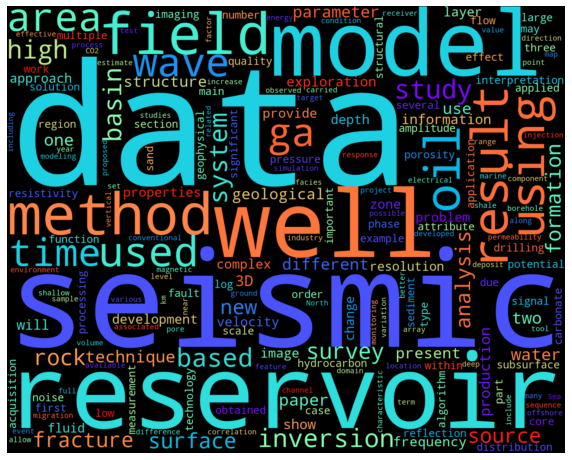

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
wordcloud = WordCloud(width=1500, height=1200, margin=0,
                      colormap='rainbow',
                      collocations=False).generate(' '.join(total_tokens))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

### **3. Compute the Word Embeddings**

### **3.1. Compute the Word Embeddings with pre-trained word embeddings**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data directory
#data_dir = "../data/"
data_dir = '/content/drive/MyDrive/'  # Uncomment if running on CoLab

# Load vectors 
wikiemb_path = os.path.join(data_dir, "wiki_w2v.bin")
geo_vecs = gensim.models.KeyedVectors.load_word2vec_format(wikiemb_path, binary=True)

In [ ]:
geo_vecs.most_similar(positive=['salt'])

[('brine', 0.7284355163574219),
 ('salts', 0.6848834156990051),
 ('salty', 0.6760126948356628),
 ('carbonate', 0.6670722961425781),
 ('brines', 0.6664916276931763),
 ('saline', 0.6565341949462891),
 ('alkali', 0.6531248092651367),
 ('niter', 0.646799623966217),
 ('lime', 0.629438042640686),
 ('gypsum', 0.6278489828109741)]

In [ ]:
geo_vecs.most_similar(positive=['ghost'])

[('ghosts', 0.6646574139595032),
 ('ghostly', 0.6553279757499695),
 ('haunted', 0.6411517858505249),
 ('hauntings', 0.6088013052940369),
 ('haunts', 0.587702751159668),
 ('creature', 0.5245285630226135),
 ('undead', 0.5211564302444458),
 ('werewolf', 0.5204572677612305),
 ('vengeful', 0.5189985036849976),
 ('poltergeists', 0.5180966258049011)]

In [ ]:
geo_vecs.most_similar(positive=['gather'])

[('gathered', 0.7673640251159668),
 ('gathering', 0.7102603912353516),
 ('collect', 0.6916781663894653),
 ('gathers', 0.6624166965484619),
 ('assemble', 0.6413277387619019),
 ('congregate', 0.6112412214279175),
 ('organize', 0.5655484199523926),
 ('locate', 0.5556583404541016),
 ('bring', 0.554919958114624),
 ('glean', 0.5455553531646729)]

In [ ]:
geo_vecs.most_similar(positive=['elastic'])

[('elasticity', 0.7719277143478394),
 ('viscoelastic', 0.6979045271873474),
 ('inelastic', 0.6725195050239563),
 ('elastically', 0.6681984663009644),
 ('tensile', 0.6660468578338623),
 ('compressible', 0.661573588848114),
 ('stiffness', 0.658748984336853),
 ('stress-strain', 0.6454143524169922),
 ('rubber-like', 0.6447772979736328),
 ('damping', 0.6445209980010986)]

### **3.2. Compute the Word Embeddings with Skipgram approach**

The tokenised sentences were used with minimal preprocessing as Skipgram approach and diffrent Vector sizes.

For this we used gensim's modelling package: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
tokenised_sents[0]

['The',
 'phase',
 'and',
 'group',
 'velocity',
 'surfaces',
 'are',
 'essential',
 'for',
 'wave',
 'propagation',
 'in',
 'anisotropic',
 'media',
 '.']

In [ ]:
sg_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=2, window=5, size=300)

In [ ]:
# Skip-gram model
sg_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=2, window=5, size=300)
sg_geoscience.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=100)

(11110021, 16031500)

In [ ]:
sg_geoscience.most_similar(positive=['salt'])

[('flanks', 0.5299030542373657),
 ('SEG/EAGE', 0.4617321789264679),
 ('dome', 0.4511210024356842),
 ('diapirism', 0.4415658116340637),
 ('Horse', 0.39878857135772705),
 ('domes', 0.39818117022514343),
 ('Marmousi‐2', 0.3963802754878998),
 ('Thunder', 0.3855521082878113),
 ('regimes', 0.3833366930484772),
 ('movement', 0.3742189407348633)]

In [ ]:
sg_geoscience.most_similar(positive=['ghost'])

[('elimination', 0.6574012041091919),
 ('generates', 0.5630114078521729),
 ('source-generated', 0.5571939945220947),
 ('firing', 0.547842800617218),
 ('demultiple', 0.5438584089279175),
 ('ambient-noise', 0.5368107557296753),
 ('datuming', 0.5345067977905273),
 ('wave‐fields', 0.5227248668670654),
 ('azimuths', 0.5206597447395325),
 ('down‐going', 0.5181258916854858)]

In [ ]:
sg_geoscience.most_similar(positive=['gather'])

[('OU', 0.4814990162849426),
 ('moveout', 0.4725291132926941),
 ('intelligence', 0.46687814593315125),
 ('receiving', 0.46271076798439026),
 ('conditioning', 0.4398515820503235),
 ('stacks', 0.4254258871078491),
 ('pick', 0.4221962094306946),
 ('concealed', 0.4189143180847168),
 ('items', 0.41329023241996765),
 ('OPV', 0.4123053550720215)]

In [ ]:
sg_geoscience.most_similar(positive=['elastic'])

[('constants', 0.43300706148147583),
 ('overcomes', 0.4078439176082611),
 ('crosscorrelation', 0.40607643127441406),
 ('orthotropy', 0.3950892686843872),
 ('moduli', 0.3908630609512329),
 ('decide', 0.38558465242385864),
 ('CC', 0.38224929571151733),
 ('cross-plots', 0.3813941478729248),
 ('crystal', 0.3723641633987427),
 ('incidence', 0.3674910068511963)]

We have performed a wide range of hyper-parameters. However, the above-selected parameters seem to have better results.

Example of vevtor_size of 500 and 200 epochs.

In [ ]:
# Skip-gram model
sg_geoscience_1 = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=2, window=5, size=500)
sg_geoscience_1.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=200)

(22218808, 32063000)

In [ ]:
sg_geoscience_1.most_similar(positive=['salt'])

[('flanks', 0.509910523891449),
 ('SEG/EAGE', 0.4394161105155945),
 ('dome', 0.43410205841064453),
 ('diapirism', 0.41216981410980225),
 ('Horse', 0.3708809018135071),
 ('domes', 0.3610657751560211),
 ('movement', 0.3563537895679474),
 ('Marmousi‐2', 0.3556109070777893),
 ('globe', 0.35402393341064453),
 ('Badenian', 0.3477223813533783)]

### **4. Comparing the Emeddings**

#### **4.1 Similarity Comparison**

We have created a function to compare the most similar word to a specified word for both the premade and custom embeddings.

In [ ]:
def comparing_embeddings_similarity(word, g_emb, sg_emb):
    g    = pd.DataFrame(g_emb.most_similar(positive=[word])[:10],columns=["g_name","g_score"])
    sg   = pd.DataFrame(sg_emb.wv.most_similar(positive=[word])[:10],columns=["sg_name","sg_score"])
    
    df = pd.concat([g, sg],axis = 1)
    display (df)

In [ ]:
word = 'salt' 

comparing_embeddings_similarity(word, geo_vecs, sg_geoscience)

,g_name,g_score,sg_name,sg_score
0,brine,0.728436,flanks,0.529903
1,salts,0.684883,SEG/EAGE,0.461732
2,salty,0.676013,dome,0.451121
3,carbonate,0.667072,diapirism,0.441566
4,brines,0.666492,Horse,0.398789
5,saline,0.656534,domes,0.398181
6,alkali,0.653125,Marmousi‐2,0.396380
7,niter,0.646800,Thunder,0.385552
8,lime,0.629438,regimes,0.383337
9,gypsum,0.627849,movement,0.374219


In [ ]:
import plotly.express as px

g_df = pd.DataFrame(sg_geoscience.most_similar(positive=['salt'])[:10],columns=["g_name","g_score"])
fig = px.bar(g_df, x='g_name', y='g_score')
fig.update_layout(title_text='Salt', xaxis_title='Similar Words', yaxis_title='Score', font_size=12)

fig.show()

In [ ]:
word = 'ghost' 

comparing_embeddings_similarity(word, geo_vecs, sg_geoscience)

,g_name,g_score,sg_name,sg_score
0,ghosts,0.664657,elimination,0.657401
1,ghostly,0.655328,generates,0.563011
2,haunted,0.641152,source-generated,0.557194
3,hauntings,0.608801,firing,0.547843
4,haunts,0.587703,demultiple,0.543858
5,creature,0.524529,ambient-noise,0.536811
6,undead,0.521156,datuming,0.534507
7,werewolf,0.520457,wave‐fields,0.522725
8,vengeful,0.518999,azimuths,0.520660
9,poltergeists,0.518097,down‐going,0.518126


In [ ]:
import plotly.express as px

g_df = pd.DataFrame(sg_geoscience.most_similar(positive=['ghost'])[:10],columns=["g_name","g_score"])
fig = px.bar(g_df, x='g_name', y='g_score')
fig.update_layout(title_text='Ghost', xaxis_title='Similar Words', yaxis_title='Score', font_size=12)

fig.show()

In [ ]:
word = 'gather' 

comparing_embeddings_similarity(word, geo_vecs, sg_geoscience)

,g_name,g_score,sg_name,sg_score
0,gathered,0.767364,OU,0.481499
1,gathering,0.710260,moveout,0.472529
2,collect,0.691678,intelligence,0.466878
3,gathers,0.662417,receiving,0.462711
4,assemble,0.641328,conditioning,0.439852
5,congregate,0.611241,stacks,0.425426
6,organize,0.565548,pick,0.422196
7,locate,0.555658,concealed,0.418914
8,bring,0.554920,items,0.413290
9,glean,0.545555,OPV,0.412305


In [ ]:

g_df = pd.DataFrame(sg_geoscience.most_similar(positive=['gather'])[:10],columns=["g_name","g_score"])
fig = px.bar(g_df, x='g_name', y='g_score')
fig.update_layout(title_text='Gather', xaxis_title='Similar Words', yaxis_title='Score', font_size=12)

fig.show()

In [ ]:
word = 'elastic' 

comparing_embeddings_similarity(word, geo_vecs, sg_geoscience)

,g_name,g_score,sg_name,sg_score
0,elasticity,0.771928,constants,0.433007
1,viscoelastic,0.697905,overcomes,0.407844
2,inelastic,0.672520,crosscorrelation,0.406076
3,elastically,0.668198,orthotropy,0.395089
4,tensile,0.666047,moduli,0.390863
5,compressible,0.661574,decide,0.385585
6,stiffness,0.658749,CC,0.382249
7,stress-strain,0.645414,cross-plots,0.381394
8,rubber-like,0.644777,crystal,0.372364
9,damping,0.644521,incidence,0.367491


In [ ]:
g_df = pd.DataFrame(sg_geoscience.most_similar(positive=['elastic'])[:10],columns=["g_name","g_score"])
fig = px.bar(g_df, x='g_name', y='g_score')
fig.update_layout(title_text='Elastic', xaxis_title='Similar Words', yaxis_title='Score', font_size=12)

fig.show()

### **5. Comparison with vector maths**

#### **5.1 Shear Vector**

In [ ]:
print (geo_vecs.most_similar(positive=["P-wave", "compressional"],negative=["shear"]))
print (sg_geoscience.wv.most_similar(positive=["P-wave", "compressional"],negative=["shear"]))

[('lithospheric', 0.5850774645805359), ('crustal', 0.5760834813117981), ('intraplate', 0.5685552358627319), ('mountain-building', 0.5659877061843872), ('forearc', 0.5562540888786316), ('tectonic', 0.5526903867721558), ('eclogite', 0.5449763536453247), ('asthenosphere', 0.5434631109237671), ('back-arc', 0.5377596616744995), ('magmatism', 0.5373349189758301)]
[('S-wave', 0.31000515818595886), ('converted-wave', 0.3046663999557495), ('S-waves', 0.30022647976875305), ('T2', 0.2802503705024719), ('blending', 0.27099213004112244), ('episode', 0.2708265781402588), ('sorting', 0.26899242401123047), ('premise', 0.26765012741088867), ('delays', 0.2667529582977295), ('severely', 0.26285281777381897)]


#### **5.2 Sandstone Vector**

In [ ]:
print (geo_vecs.most_similar(positive=["seal", "mudstone"],negative=["sandstone"]))
print (sg_geoscience.wv.most_similar(positive=["seal", "mudstone"],negative=["sandstone"]))

[('seals', 0.6232339143753052), ('sealing', 0.4577387869358063), ('sealed', 0.4355558156967163), ('Seal', 0.4271200895309448), ('bulla', 0.4231832027435303), ('pinniped', 0.4063176214694977), ('narwhals', 0.4044525623321533), ('rorquals', 0.4026482403278351), ('narwhal', 0.4016648530960083), ('walruses', 0.3963857591152191)]
[('overlie', 0.44302552938461304), ('Nahr', 0.43762093782424927), ('strike', 0.4358412027359009), ('Umr', 0.4275052547454834), ('Norwegian–Danish', 0.4234457015991211), ('breach', 0.423351526260376), ('bituminous', 0.4054398536682129), ('Silurian', 0.40168648958206177), ('Bazhenov', 0.3924528658390045), ('Yantata', 0.39211615920066833)]


#### **5.3 Shear Vector**

In [ ]:
print (geo_vecs.most_similar(positive=["migration", "time"],negative=["depth"]))
print (sg_geoscience.wv.most_similar(positive=["migration", "time"],negative=["depth"]))

[('migrating', 0.5081616044044495), ('emigration', 0.501492977142334), ('migrations', 0.48954400420188904), ('immigrating', 0.4749516248703003), ('emigrations', 0.467757910490036), ('immigrate', 0.4318339228630066), ('migrated', 0.4316360354423523), ('immigration', 0.42431867122650146), ('migrate', 0.42104965448379517), ('exodus', 0.4141181707382202)]
[('impulsive', 0.3250521421432495), ('3‐D', 0.3139041066169739), ('treats', 0.3093526363372803), ('reverse', 0.29698753356933594), ('shifts', 0.2953032851219177), ('lag', 0.2843810021877289), ('pathways', 0.28352677822113037), ('FWM', 0.2778239846229553), ('gradiometry', 0.2774087190628052), ('false', 0.27243906259536743)]


#### **5.4 Wavefield Vector**

In [ ]:
print (geo_vecs.most_similar(positive=["Kirchoff", "ray"],negative=["wave"]))
print (sg_geoscience.wv.most_similar(positive=["Kirchoff", "ray"],negative=["wave"]))

[('Wintermute', 0.41765296459198), ('Rolston', 0.3972933292388916), ('Cress', 0.3861284852027893), ('Sloane', 0.3853258788585663), ('rays', 0.38185131549835205), ('Baggett', 0.37805578112602234), ('Stearn', 0.3776858448982239), ('Motter', 0.3763987421989441), ('Pondsmith', 0.3722383975982666), ('Zindel', 0.3720148205757141)]
[('imposed', 0.4374691843986511), ('tracing', 0.4310823678970337), ('Time', 0.42023083567619324), ('Migration', 0.4022473096847534), ('muon', 0.37237945199012756), ('Particle', 0.36869826912879944), ('tracer', 0.36499547958374023), ('pair', 0.36430269479751587), ('antenna', 0.3619692325592041), ('Swarm', 0.35997632145881653)]


## **6. Conclusions**

1.	Word processing can be precious to understand and interpret knowledge transfer.
2.	Numerical analysis of words and sentence lengths can help efficiency to highlight misunderstanding across disciplines. 
3.	The information can be focused and can be user-defined to test data strategies to decrease overall model uncertainty. 
4.	The automated approach provides a user-controlled, quick and easy word assessment of the language associated with geological and geophysical disciplines.
5.	Skipgram approach performs better to analyse G&G languages data.

## **7. Future work**

The project can be compared with theContinuous Bag of Words (CBOW) Model.
The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).
https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-cbow.html

## **8. Reference**

1. What is the shear equivalent of a P-wave? https://www.earthdoc.org/docserver/fulltext/fb/38/7/fb2020051.pdf?expires=1619893516&id=id&accname=fromqa190&checksum=9E55711AF8CF1D67250F04B959D084CD.


2. Geoscientific WORD EMBEDDINGS - https://github.com/cebirnie92/KAUST-Iraya_SummerSchool2021 

<img src="https://i.imgur.com/WFvGOPf.png">